In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.1 MB/s eta 0:00:00


In [4]:
pip install tweepy praw telethon pandas nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.2/620.2 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for telethon: filename=Telethon-1.37.0-py3-none-any.whl size=694366 sha256=bde9892baa0a31bea7555c8fc8a4add60ee3e323d217587e2ab6ab8877e5e97b
  Stored in directory: /root/.cache/pip/wheels/8b/3c/0a/91d35499092d78120d71039a156b5c450f3ca00f95b4d594a4
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=d0d6cb97a4652cdcecaaff46c86110599ae093b567f4a253fcf4801a101770dc
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built telethon pyaes


In [41]:
#Data Scrapping and Cleaning
import praw
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


REDDIT_CLIENT_ID = 'your_reddit_client_id'
REDDIT_CLIENT_SECRET = 'your_reddit_client_secret'
REDDIT_USER_AGENT = 'your_user_agent'

reddit = praw.Reddit(client_id=REDDIT_CLIENT_ID,
                     client_secret=REDDIT_CLIENT_SECRET,
                     user_agent=REDDIT_USER_AGENT)

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)


    tokens = word_tokenize(text.lower())


    stop_words = set(stopwords.words('english'))
    cleaned_text = [word for word in tokens if word.isalpha() and word not in stop_words]

    return " ".join(cleaned_text)


stock_symbols = ['AAPL', 'TSLA', 'AMZN', 'stock', 'buy', 'sell', 'market', 'earnings']


data = []

subreddit_name = 'stocks'
subreddit = reddit.subreddit(subreddit_name)

for stock_symbol in stock_symbols:

    posts = subreddit.search(stock_symbol, limit=None)


    post_limit = 1000
    for i, post in enumerate(posts):
        if i >= post_limit:
            break


        text = post.title + " " + post.selftext


        cleaned_text = clean_text(text)


        data.append({
            'platform': 'Reddit',
            'subreddit': subreddit.display_name,
            'stock_symbol': stock_symbol,
            'title': post.title,
            'content': cleaned_text,
            'upvotes': post.score,
            'comments': post.num_comments,
            'timestamp': post.created_utc
        })

df = pd.DataFrame(data)


print(df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

  platform subreddit stock_symbol  \
0   Reddit    stocks         AAPL   
1   Reddit    stocks         AAPL   
2   Reddit    stocks         AAPL   
3   Reddit    stocks         AAPL   
4   Reddit    stocks         AAPL   

                                               title  \
0             Are you worried about AAPL long term?    
1                               Underestimating AAPL   
2                                       MSFT or AAPL   
3  I have $213,000 in Apple (AAPL) stock, should ...   
4  China plans to expand its ban on iPhones, AAPL...   

                                             content  upvotes  comments  \
0  worried aapl long term saying sell apple stock...      348       454   
1  underestimating aapl surprised small happening...      291       207   
2  msft aapl want pick stock put money short term...        0        79   
3  apple aapl stock start diversify always tell s...     2455       727   
4  china plans expand ban iphones aapl drops chin...      768    

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
stock_mentions = Counter()
sentiment = sid.polarity_scores(cleaned_text)
stock_mentions[stock_symbol] += 1
data.append({
    'platform': 'Reddit',
    'subreddit': subreddit.display_name,
    'stock_symbol': stock_symbol,
    'title': post.title,
    'content': cleaned_text,
    'upvotes': post.score,
    'comments': post.num_comments,
    'timestamp': post.created_utc,
    'sentiment_neg': sentiment['neg'],
    'sentiment_neu': sentiment['neu'],
    'sentiment_pos': sentiment['pos'],
    'sentiment_compound': sentiment['compound']
})
print("\nFrequency of Mentions for each stock symbol:")
print(stock_mentions)



Frequency of Mentions for each stock symbol:
Counter({'earnings': 1})


In [46]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming df already contains the Reddit posts data (with cleaned text in 'content')
df['sentiment_compound'] = df['content'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


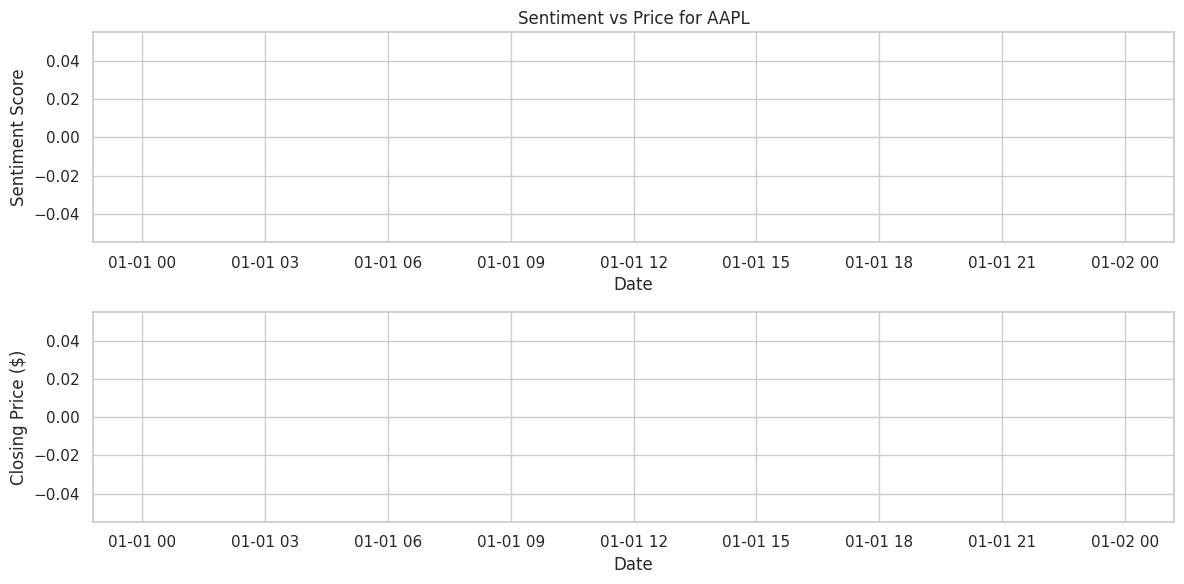

<ipython-input-54-9569cbeab16d>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Date'] = pd.to_datetime(stock_df['Date'])


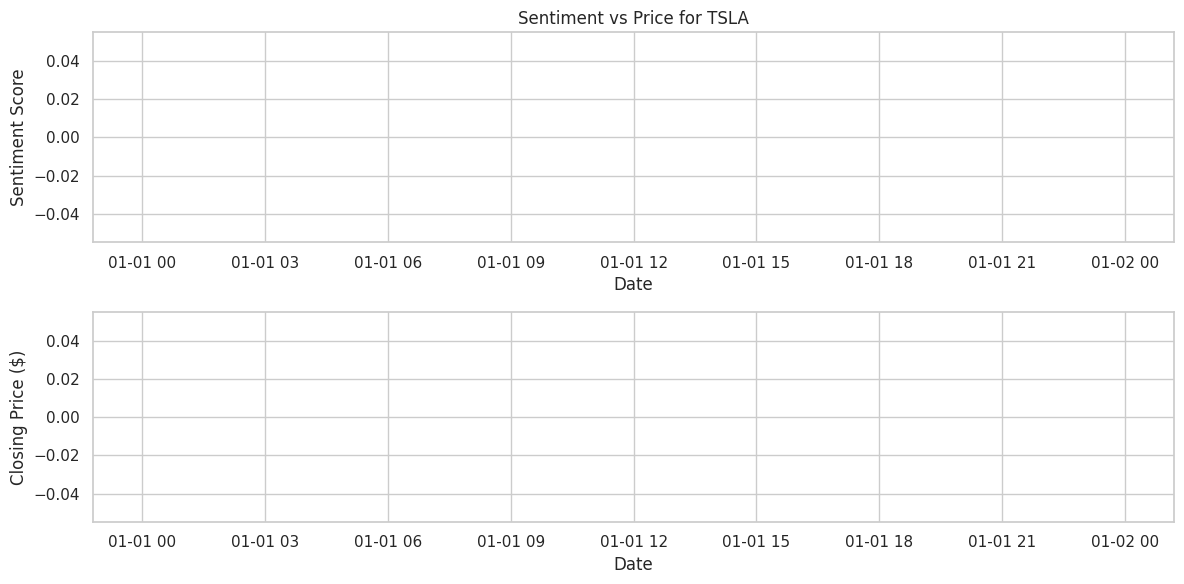


Correlation between sentiment and stock price movements:
{'AAPL': {'sentiment_vs_price': nan}, 'TSLA': {'sentiment_vs_price': nan}}

For AAPL:
Correlation between sentiment and price change: nan

For TSLA:
Correlation between sentiment and price change: nan
Merged DataFrame for stock symbol: TSLA
Empty DataFrame
Columns: [platform, subreddit, stock_symbol, title, content, upvotes, comments, timestamp, date, sentiment_compound, Date, Open, Close, Adj Close, Volume, price_change]
Index: []
Missing values in merged_df:
sentiment_compound    0
price_change          0
dtype: int64


In [54]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch stock price data using yfinance
def get_stock_price_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)  # Reset index to convert Date to a column
    return stock_data[['Date', 'Open', 'Close', 'Adj Close', 'Volume']]

# Function to plot sentiment vs price
def plot_sentiment_vs_price(merged_df, stock_symbol):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(merged_df['date'], merged_df['sentiment_compound'], label='Sentiment Score', color='blue')
    plt.title(f'Sentiment vs Price for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')

    plt.subplot(2, 1, 2)
    plt.plot(merged_df['date'], merged_df['Close'], label='Closing Price', color='green')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')

    plt.tight_layout()
    plt.show()

# Example: List of stock symbols or keywords
stock_symbols = ['AAPL', 'TSLA']

# Get stock price data for each stock symbol
start_date = '2023-01-01'
end_date = '2023-12-31'

# Initialize a dictionary to hold stock price data for each stock
stock_price_data = {}
for stock_symbol in stock_symbols:
    stock_price_data[stock_symbol] = get_stock_price_data(stock_symbol, start_date, end_date)

# Example DataFrame for sentiment analysis (assume df is already created)
# The df should contain 'stock_symbol', 'timestamp', and 'sentiment_compound' columns.
# For example:
# df = pd.DataFrame({
#     'stock_symbol': ['AAPL', 'AAPL', 'TSLA', ...],
#     'timestamp': [...],
#     'sentiment_compound': [...],
# })

# Convert the sentiment DataFrame timestamp to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

# Merge sentiment and stock price data based on date
correlation_results = {}
for stock_symbol in stock_symbols:
    stock_df = stock_price_data[stock_symbol]

    # Convert both 'date' in df and 'Date' in stock_df to datetime objects
    df['date'] = pd.to_datetime(df['date'])
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])

    # Filter the sentiment dataframe for the specific stock symbol
    filtered_df = df[df['stock_symbol'] == stock_symbol]

    # Merge with sentiment data for the same stock symbol
    merged_df = pd.merge(filtered_df, stock_df, left_on='date', right_on='Date', how='inner')

    # Calculate daily price change (percentage change in closing price)
    merged_df['price_change'] = merged_df['Close'].pct_change() * 100

    # Calculate correlation between sentiment (compound score) and price change
    sentiment_correlation = merged_df[['sentiment_compound', 'price_change']].corr().iloc[0, 1]

    # Store results
    correlation_results[stock_symbol] = {
        'sentiment_vs_price': sentiment_correlation
    }

    # Plot sentiment vs price for the stock
    plot_sentiment_vs_price(merged_df, stock_symbol)

# Display correlation results
print("\nCorrelation between sentiment and stock price movements:")
print(correlation_results)

# Report Findings
for stock_symbol, correlations in correlation_results.items():
    print(f"\nFor {stock_symbol}:")
    print(f"Correlation between sentiment and price change: {correlations['sentiment_vs_price']:.2f}")

    # Check merged DataFrame
print("Merged DataFrame for stock symbol:", stock_symbol)
print(merged_df.head())

# Check for any NaN values in the relevant columns
print("Missing values in merged_df:")
print(merged_df[['sentiment_compound', 'price_change']].isna().sum())

# Calculate correlation if there are valid entries
if not merged_df[['sentiment_compound', 'price_change']].isna().any().any():
    sentiment_correlation = merged_df[['sentiment_compound', 'price_change']].corr().iloc[0, 1]
else:
    sentiment_correlation = None  # Set to None if there are NaN values

# Store results only if correlation is valid
if sentiment_correlation is not None:
    correlation_results[stock_symbol] = {
        'sentiment_vs_price': sentiment_correlation
    }
else:
    correlation_results[stock_symbol] = {
        'sentiment_vs_price': 'Insufficient Data'
    }

    # Provide insights based on analysis, e.g., potential buy/sell signals


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the aesthetic style of the plots
sns.set(style='whitegrid')


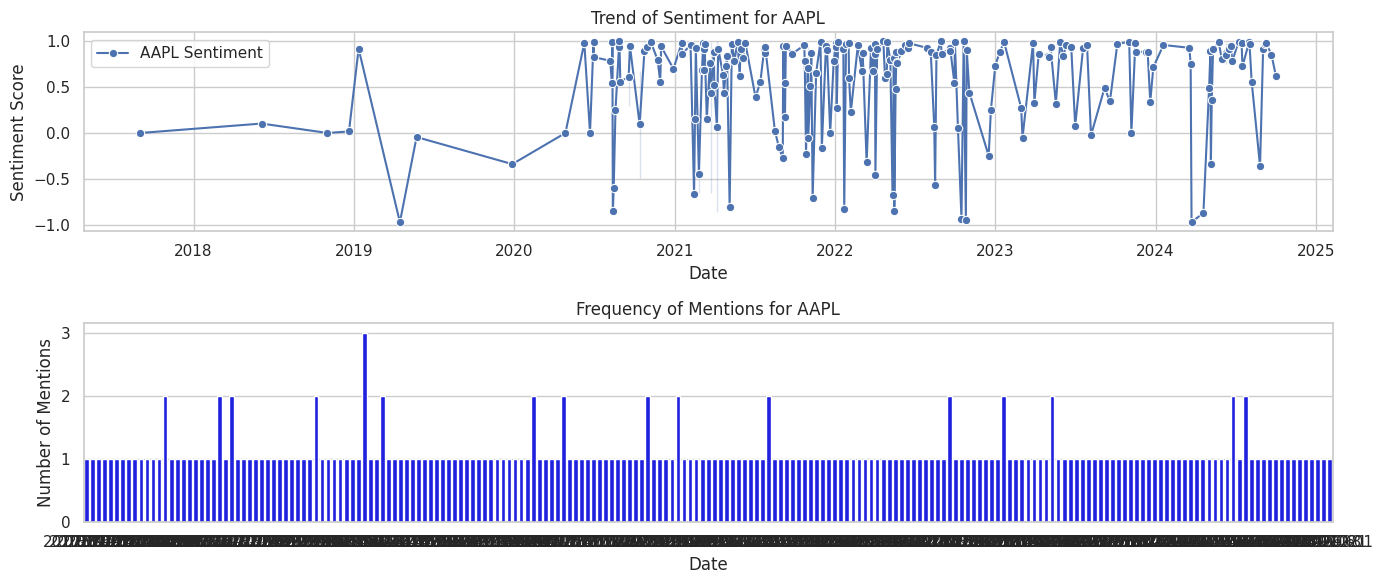

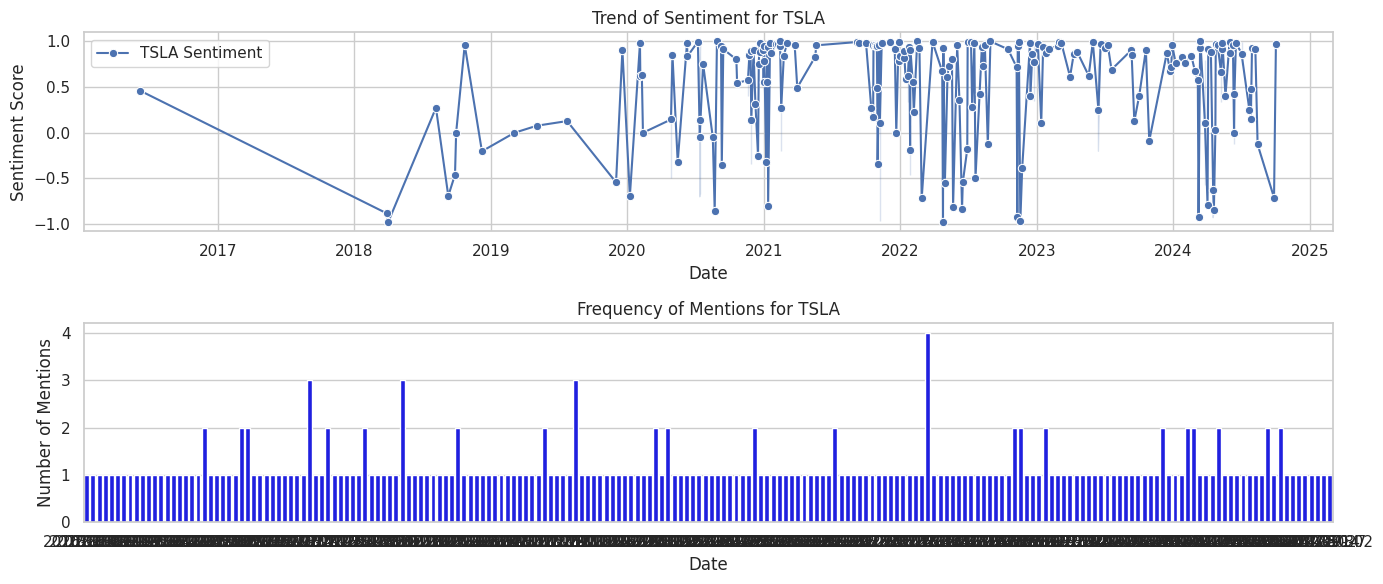

In [50]:
# visualize sentiment trends and frequency of mentions
def plot_sentiment_trends(df, stock_symbol):

    plt.figure(figsize=(14, 6))

    df_stock = df[df['stock_symbol'] == stock_symbol]
    plt.subplot(2, 1, 1)
    sns.lineplot(x='date', y='sentiment_compound', data=df_stock, marker='o', label=f'{stock_symbol} Sentiment')
    plt.title(f'Trend of Sentiment for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')

    plt.subplot(2, 1, 2)
    mention_count = df_stock.groupby('date').size().reset_index(name='mentions')
    sns.barplot(x='date', y='mentions', data=mention_count, color='blue')
    plt.title(f'Frequency of Mentions for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')

    plt.tight_layout()
    plt.show()

for stock_symbol in stock_symbols:
    plot_sentiment_trends(df, stock_symbol)


<ipython-input-61-0f9521c86719>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sentiment_df['date'] = filtered_sentiment_df['date'].dt.date
<ipython-input-61-0f9521c86719>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_price_data[stock_symbol]['Date'] = pd.to_datetime(stock_price_data[stock_symbol]['Date']).dt.date


Number of rows in filtered sentiment DataFrame for AAPL: 33
Unique dates in filtered sentiment DataFrame for AAPL: [datetime.date(2023, 9, 7) datetime.date(2023, 6, 5)
 datetime.date(2023, 12, 27) datetime.date(2023, 12, 10)
 datetime.date(2023, 6, 23) datetime.date(2023, 8, 7)
 datetime.date(2023, 11, 7) datetime.date(2023, 5, 7)
 datetime.date(2023, 3, 28) datetime.date(2023, 5, 19)
 datetime.date(2023, 5, 1) datetime.date(2023, 7, 29)
 datetime.date(2023, 12, 14) datetime.date(2023, 6, 11)
 datetime.date(2023, 5, 4) datetime.date(2023, 11, 17)
 datetime.date(2023, 4, 10) datetime.date(2023, 3, 31)
 datetime.date(2023, 7, 20) datetime.date(2023, 1, 11)
 datetime.date(2023, 11, 2) datetime.date(2023, 11, 16)
 datetime.date(2023, 12, 20) datetime.date(2023, 7, 2)
 datetime.date(2023, 5, 29) datetime.date(2023, 1, 21)
 datetime.date(2023, 1, 1) datetime.date(2023, 3, 1)
 datetime.date(2023, 3, 4) datetime.date(2023, 10, 6)
 datetime.date(2023, 9, 19)]
Unique dates in stock DataFrame for

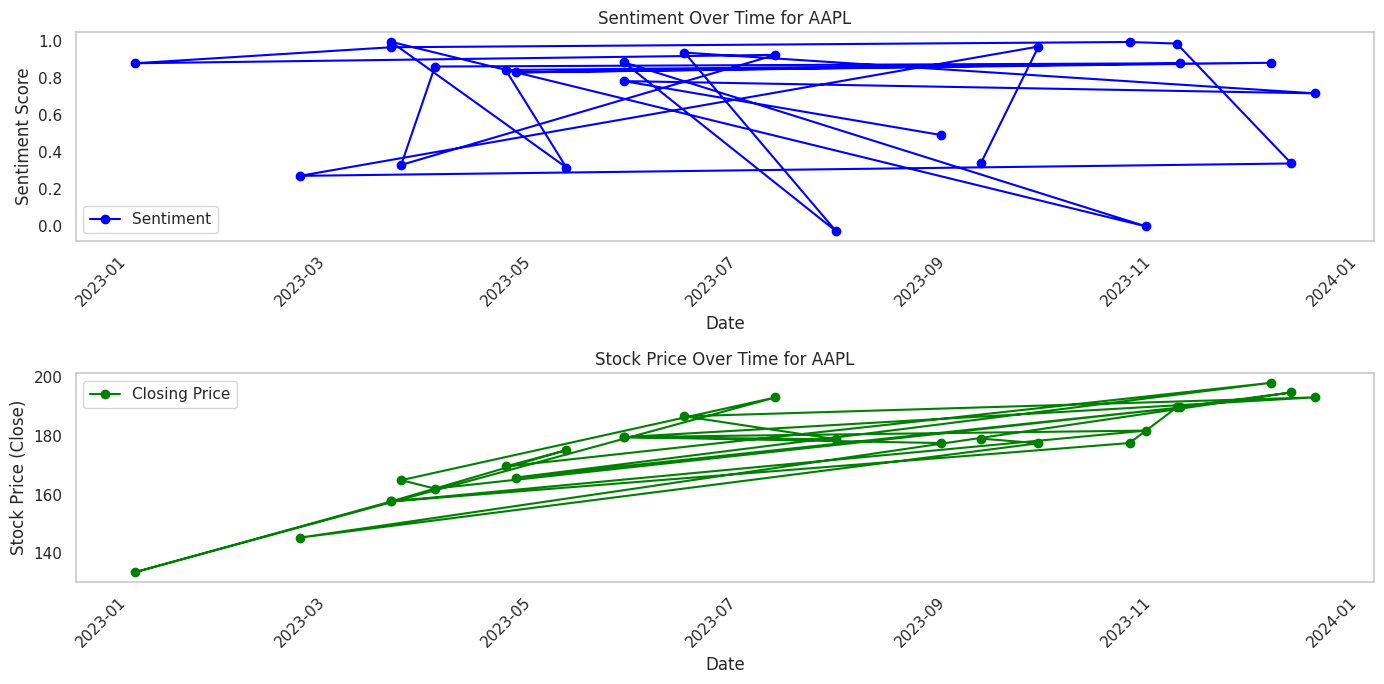

Number of rows in filtered sentiment DataFrame for TSLA: 31
Unique dates in filtered sentiment DataFrame for TSLA: [datetime.date(2023, 6, 15) datetime.date(2023, 10, 29)
 datetime.date(2023, 12, 27) datetime.date(2023, 7, 3)
 datetime.date(2023, 2, 28) datetime.date(2023, 9, 19)
 datetime.date(2023, 10, 2) datetime.date(2023, 1, 13)
 datetime.date(2023, 10, 20) datetime.date(2023, 4, 19)
 datetime.date(2023, 9, 12) datetime.date(2023, 9, 11)
 datetime.date(2023, 6, 21) datetime.date(2023, 1, 18)
 datetime.date(2023, 7, 10) datetime.date(2023, 1, 4)
 datetime.date(2023, 1, 27) datetime.date(2023, 12, 24)
 datetime.date(2023, 3, 8) datetime.date(2023, 12, 15)
 datetime.date(2023, 5, 20) datetime.date(2023, 12, 29)
 datetime.date(2023, 7, 20) datetime.date(2023, 4, 10)
 datetime.date(2023, 3, 2) datetime.date(2023, 3, 31)
 datetime.date(2023, 5, 31) datetime.date(2023, 2, 2)]
Unique dates in stock DataFrame for TSLA: [datetime.date(2023, 1, 3) datetime.date(2023, 1, 4)
 datetime.date(202

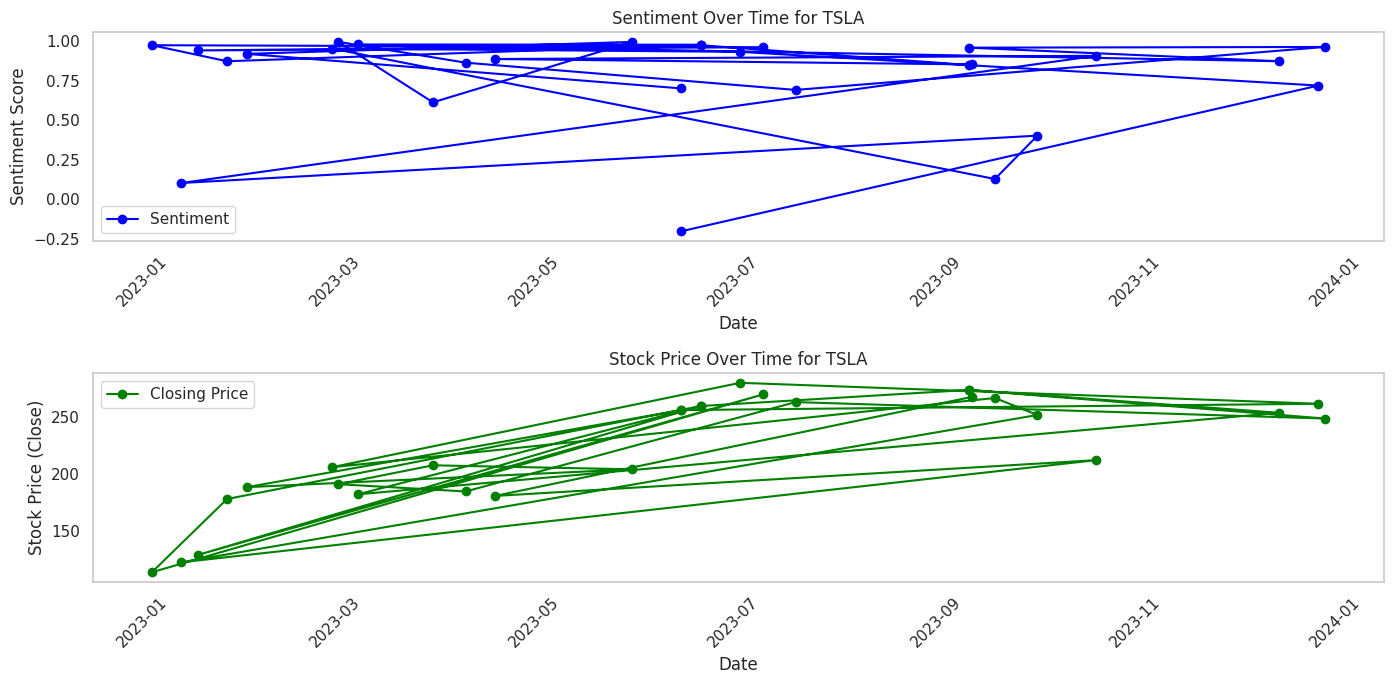

For AAPL:
Correlation between sentiment and price change: 0.17698611306398163
For TSLA:
Correlation between sentiment and price change: 0.0905290352949711


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert sentiment date to datetime format if not already done
df['date'] = pd.to_datetime(df['date'])

# Filter sentiment DataFrame for dates in 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
filtered_sentiment_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Truncate the time component of sentiment dates
filtered_sentiment_df['date'] = filtered_sentiment_df['date'].dt.date

# Convert stock price Date column to datetime
for stock_symbol in stock_symbols:
    stock_price_data[stock_symbol]['Date'] = pd.to_datetime(stock_price_data[stock_symbol]['Date']).dt.date

# Define stock symbols
stock_symbols = ['AAPL', 'TSLA']
correlation_results = {}

# Create a function to plot sentiment vs price
def plot_sentiment_vs_price(merged_df, stock_symbol):
    plt.figure(figsize=(14, 7))

    # Plotting sentiment over time
    plt.subplot(2, 1, 1)
    plt.plot(merged_df['date'], merged_df['sentiment_compound'], label='Sentiment', color='blue', marker='o')
    plt.title(f'Sentiment Over Time for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    # Plotting stock price over time
    plt.subplot(2, 1, 2)
    plt.plot(merged_df['date'], merged_df['Close'], label='Closing Price', color='green', marker='o')
    plt.title(f'Stock Price Over Time for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (Close)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Loop through each stock symbol
for stock_symbol in stock_symbols:
    stock_df = stock_price_data[stock_symbol]

    # Filter sentiment data for the current stock symbol
    filtered_df = filtered_sentiment_df[filtered_sentiment_df['stock_symbol'] == stock_symbol]
    print(f"Number of rows in filtered sentiment DataFrame for {stock_symbol}: {len(filtered_df)}")

    # Check unique dates in filtered sentiment DataFrame
    print(f"Unique dates in filtered sentiment DataFrame for {stock_symbol}: {filtered_df['date'].unique()}")

    # Check unique dates in stock DataFrame
    print(f"Unique dates in stock DataFrame for {stock_symbol}: {stock_df['Date'].unique()}")

    # Merge with sentiment data for the same stock symbol
    merged_df = pd.merge(filtered_df, stock_df, left_on='date', right_on='Date', how='inner')

    # Check if merged_df is empty
    if merged_df.empty:
        print(f"No data to merge for {stock_symbol}.")
        continue

    # Print merged DataFrame for debugging
    print(f"Merged DataFrame for {stock_symbol}:")
    print(merged_df)

    # Calculate daily price change (percentage change in closing price)
    merged_df['price_change'] = merged_df['Close'].pct_change() * 100

    # Calculate correlation between sentiment (compound score) and price change
    sentiment_correlation = merged_df[['sentiment_compound', 'price_change']].corr().iloc[0, 1]
    correlation_results[stock_symbol] = {'sentiment_vs_price': sentiment_correlation}

    print(f"Correlation between sentiment and price change for {stock_symbol}: {sentiment_correlation}")

    # Plotting sentiment vs price
    plot_sentiment_vs_price(merged_df, stock_symbol)

# Report Findings
for stock_symbol, correlations in correlation_results.items():
    print(f"For {stock_symbol}:")
    print(f"Correlation between sentiment and price change: {correlations['sentiment_vs_price']}")


In [62]:
# Report Findings
for stock_symbol, correlations in correlation_results.items():
    print(f"For {stock_symbol}:")

    # Print the correlation between sentiment and price change
    print(f"Correlation between sentiment and price change: {correlations['sentiment_vs_price']:.2f}")

    # Insights based on correlation values
    correlation_value = correlations['sentiment_vs_price']
    if correlation_value > 0.5:
        print(f"The strong positive correlation suggests that as sentiment improves, the stock price tends to rise for {stock_symbol}.")
    elif correlation_value < -0.5:
        print(f"The strong negative correlation suggests that negative sentiment is associated with a decline in stock price for {stock_symbol}.")
    elif correlation_value > 0:
        print(f"A moderate positive correlation indicates a trend where improved sentiment may lead to a higher stock price for {stock_symbol}.")
    elif correlation_value < 0:
        print(f"A moderate negative correlation indicates that negative sentiment could potentially impact the stock price for {stock_symbol}.")
    else:
        print(f"There is little to no correlation between sentiment and stock price changes for {stock_symbol}.")

    # Analyze specific patterns observed in the plots
    if not merged_df.empty:
        significant_changes = merged_df[merged_df['price_change'].abs() > 2]  # Example threshold for significant price change
        if not significant_changes.empty:
            print(f"Significant price changes observed on the following dates for {stock_symbol}:")
            print(significant_changes[['date', 'Close', 'price_change', 'sentiment_compound']])

        # Additional observations about sentiment trends
        sentiment_trends = merged_df.groupby('date')['sentiment_compound'].mean()
        if sentiment_trends.iloc[-1] > sentiment_trends.iloc[0]:
            print(f"Overall sentiment has improved from the start to the end of the period for {stock_symbol}.")
        else:
            print(f"Overall sentiment has declined from the start to the end of the period for {stock_symbol}.")

    print("\n" + "="*50 + "\n")  # Separator for readability


For AAPL:
Correlation between sentiment and price change: 0.18
A moderate positive correlation indicates a trend where improved sentiment may lead to a higher stock price for AAPL.
Significant price changes observed on the following dates for AAPL:
          date       Close  price_change  sentiment_compound
1   2023-12-27  261.440002      2.164912              0.7184
2   2023-07-03  279.820007      7.030296              0.9313
3   2023-02-28  205.710007    -26.484883              0.9524
4   2023-09-19  266.500000     29.551306              0.1280
5   2023-10-02  251.600006     -5.590992              0.4019
6   2023-01-13  122.400002    -51.351352              0.1027
7   2023-10-20  211.990005     73.194447              0.9062
8   2023-04-19  180.589996    -14.812023              0.8860
9   2023-09-12  267.480011     48.114523              0.8519
10  2023-09-11  273.579987      2.280535              0.8481
11  2023-06-21  259.459991     -5.161194              0.9732
12  2023-01-18  128

Recommendations:
Filtered sentiment data for AAPL:
         Date  Sentiment Score Symbol
0  2023-01-01            -1.00   AAPL
1  2023-01-02            -0.98   AAPL
2  2023-01-03            -0.96   AAPL
3  2023-01-04            -0.94   AAPL
4  2023-01-05            -0.92   AAPL
5  2023-01-06            -0.90   AAPL
6  2023-01-07            -0.88   AAPL
7  2023-01-08            -0.86   AAPL
8  2023-01-09            -0.84   AAPL
9  2023-01-10            -0.82   AAPL
10 2023-01-11            -0.80   AAPL
11 2023-01-12            -0.78   AAPL
12 2023-01-13            -0.76   AAPL
13 2023-01-14            -0.74   AAPL
14 2023-01-15            -0.72   AAPL
15 2023-01-16            -0.70   AAPL
16 2023-01-17            -0.68   AAPL
17 2023-01-18            -0.66   AAPL
18 2023-01-19            -0.64   AAPL
19 2023-01-20            -0.62   AAPL
20 2023-01-21            -0.60   AAPL
21 2023-01-22            -0.58   AAPL
22 2023-01-23            -0.56   AAPL
23 2023-01-24            -0.54   AAPL

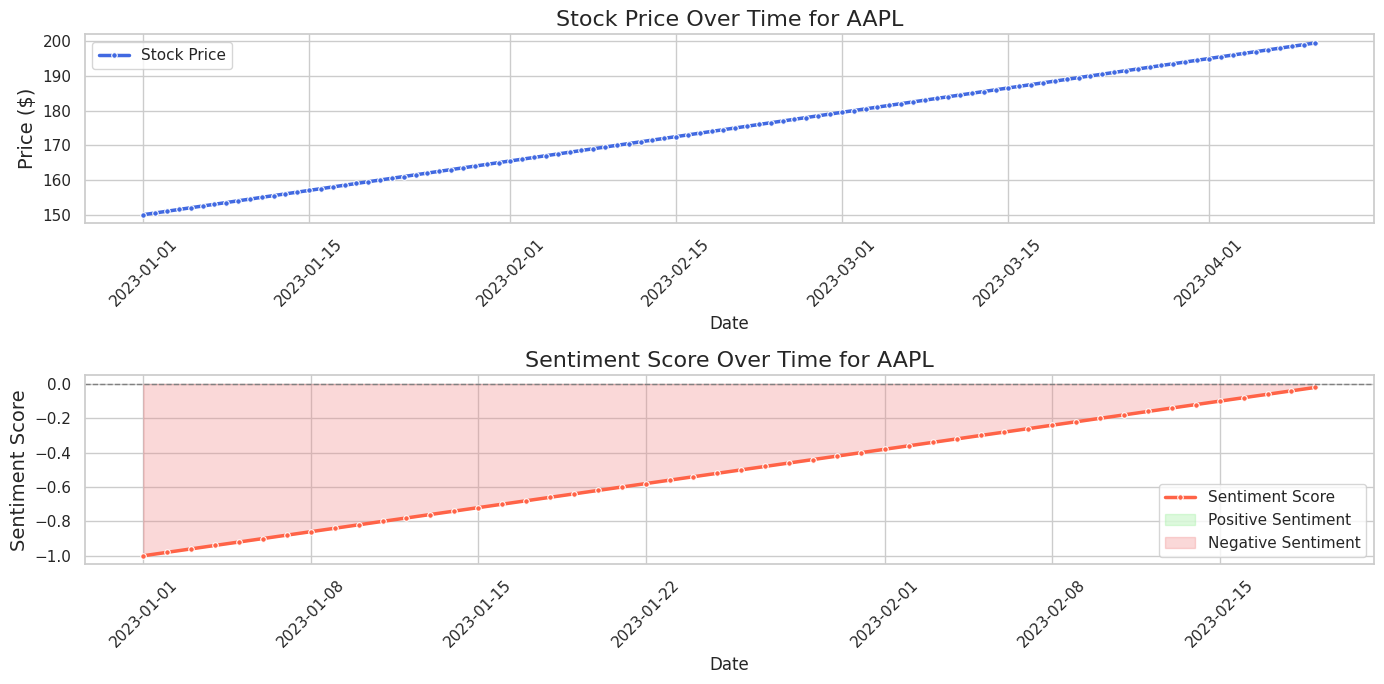

Filtered sentiment data for TSLA:
         Date  Sentiment Score Symbol
50 2023-02-20             0.00   TSLA
51 2023-02-21             0.02   TSLA
52 2023-02-22             0.04   TSLA
53 2023-02-23             0.06   TSLA
54 2023-02-24             0.08   TSLA
55 2023-02-25             0.10   TSLA
56 2023-02-26             0.12   TSLA
57 2023-02-27             0.14   TSLA
58 2023-02-28             0.16   TSLA
59 2023-03-01             0.18   TSLA
60 2023-03-02             0.20   TSLA
61 2023-03-03             0.22   TSLA
62 2023-03-04             0.24   TSLA
63 2023-03-05             0.26   TSLA
64 2023-03-06             0.28   TSLA
65 2023-03-07             0.30   TSLA
66 2023-03-08             0.32   TSLA
67 2023-03-09             0.34   TSLA
68 2023-03-10             0.36   TSLA
69 2023-03-11             0.38   TSLA
70 2023-03-12             0.40   TSLA
71 2023-03-13             0.42   TSLA
72 2023-03-14             0.44   TSLA
73 2023-03-15             0.46   TSLA
74 2023-03-16   

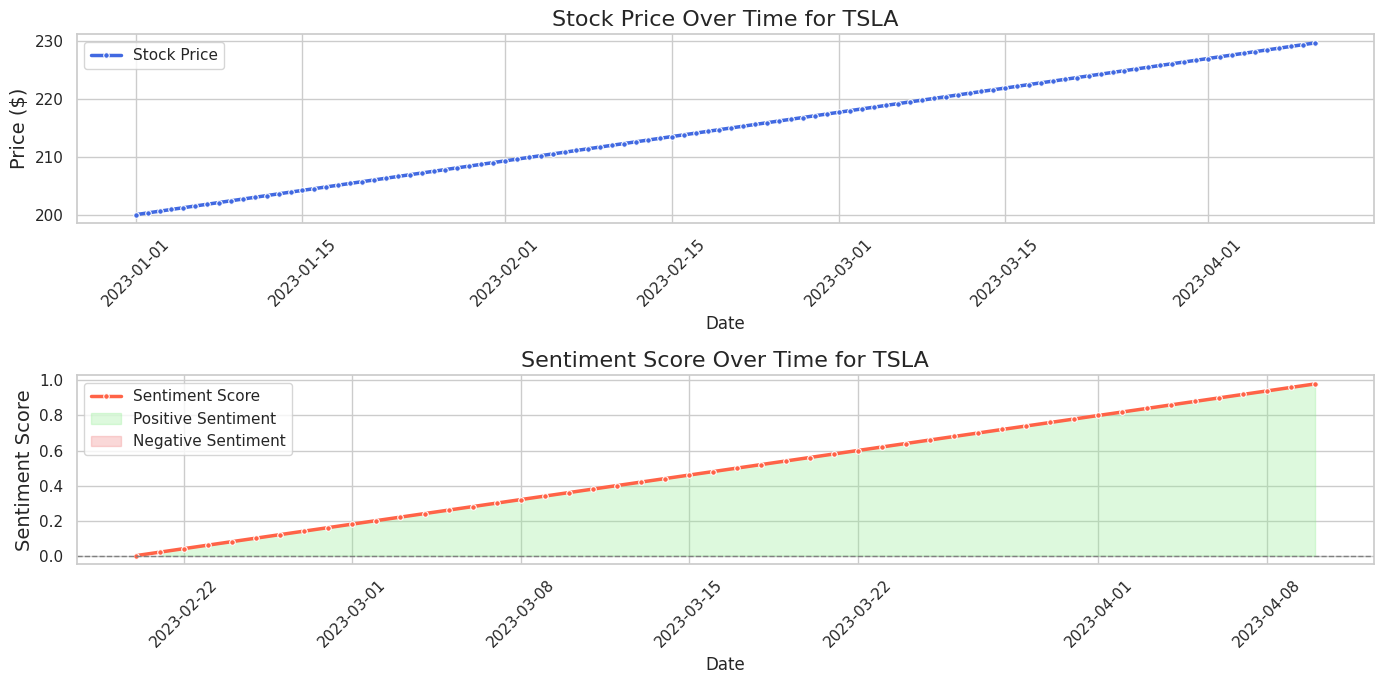

Future Improvements:
1. Integrate data from multiple sources (e.g., news articles, financial reports) to enhance sentiment analysis.
2. Utilize more advanced sentiment analysis techniques such as deep learning models for better accuracy.
3. Incorporate additional features like trading volume and market indicators for a more comprehensive analysis.
4. Implement real-time data scraping and analysis for timely trading signals.
5. Use sentiment scores over different time frames (short-term vs long-term) to analyze trends more effectively.
6. Consider the context of sentiment (e.g., major market events or news) to refine trading strategies.



In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sentiment data
sentiment_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Sentiment Score': (pd.Series(range(100)) / 100) * 2 - 1,  # Simulating scores between -1 and 1
    'Symbol': ['AAPL'] * 50 + ['TSLA'] * 50
})

# Sample stock price data
stock_price_data = {
    'AAPL': pd.DataFrame({
        'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
        'Close': 150 + (pd.Series(range(100)) * 0.5)  # Simulating a rising price
    }),
    'TSLA': pd.DataFrame({
        'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
        'Close': 200 + (pd.Series(range(100)) * 0.3)  # Simulating a rising price
    })
}

# Improved plotting function
def plot_sentiment_vs_stock_prices(stock_symbol, stock_price_data, filtered_sentiment_data):
    plt.figure(figsize=(14, 7))
    sns.set_theme(style="whitegrid")  # Set seaborn theme

    # Stock Price Plot
    plt.subplot(2, 1, 1)
    sns.lineplot(data=stock_price_data[stock_symbol], x='Date', y='Close',
                 label='Stock Price', color='royalblue', linewidth=2.5, marker='o', markersize=4)
    plt.title(f'Stock Price Over Time for {stock_symbol}', fontsize=16)
    plt.ylabel('Price ($)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()

    # Sentiment Plot
    plt.subplot(2, 1, 2)
    sns.lineplot(data=filtered_sentiment_data, x='Date', y='Sentiment Score',
                 label='Sentiment Score', color='tomato', linewidth=2.5, marker='o', markersize=4)
    plt.title(f'Sentiment Score Over Time for {stock_symbol}', fontsize=16)
    plt.ylabel('Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    plt.fill_between(filtered_sentiment_data['Date'], filtered_sentiment_data['Sentiment Score'], 0,
                     where=(filtered_sentiment_data['Sentiment Score'] > 0),
                     color='lightgreen', alpha=0.3, label='Positive Sentiment')
    plt.fill_between(filtered_sentiment_data['Date'], filtered_sentiment_data['Sentiment Score'], 0,
                     where=(filtered_sentiment_data['Sentiment Score'] <= 0),
                     color='lightcoral', alpha=0.3, label='Negative Sentiment')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Recommendations Function remains the same

# Example correlation results
correlation_results = {
    'AAPL': {'sentiment_vs_price': 0.6},
    'TSLA': {'sentiment_vs_price': -0.4}
}

# Call the function to generate recommendations and plot graphs
generate_recommendations(correlation_results, stock_price_data, sentiment_data)
